## cartoon-ify Project

This project proposes a tool for converting images to cartoons that uses python libraries such as scikit-image, OpenCV, and others to segment the input image using k-means clustering.

This project was conducted by: Feziwe M Shongwe (2135313)

Importing Libraries

In [197]:
import numpy as np
import matplotlib.pyplot as plt

import cv2
from skimage import color
from skimage.io import imread
from skimage import img_as_ubyte
from skimage.filters import threshold_local

from scipy.ndimage import median_filter


## A method for Creating an Edge mask an Input image

- I converted it from a colour image to a greyscale image in order to prepare it for edge detection.


- Due to the limitations of global thresholding, having the same threshold value T may not be sufficient for different images as it may only work on a specific part of some images due to differences in lighting, shadowing, and so on. As a result, the edge mask is obtained by applying adaptive thresholding to a greyscale image.  The image below shows the effect of global and adaptive thresholding on an image.





In [198]:
#Method for creating an edge for an input image
def edge_mask_detection(img):
    """
    img : input Image (RGB image)
    output: edge mask of the input image
    """

    # Convert the input image to gray scale an make the grayscale image integers
    gray = img_as_ubyte(color.rgb2gray(img))

    # Peform adaptive threshold, offet>>thickness of the edges
    neighbour_hood = 25
    edges_2 = threshold_local(gray,neighbour_hood, offset=20)
    final_edges = gray > edges_2


    return  final_edges
  

## Method for Image Quantization (nth Dominant colours in an Image)

- In this method i will be determining dominant 4/8 colours depending on the value of K used by the user.
- The image was segmemented using the K-Clustering technique using k clusters
- Before applyinf the clustering to the input image, recall that the image is in RGB. Thus I will reshape the image to the number of pixel(nxm)>> (M) and 3 coloumns. After perfoming the clustering the results will  have the specified colours then I will reshape it again to be in the form of the input image
- The K-Clustering technique is iterative, i performed 20 iterations for the epsilon of 1 to converge.
- Used 10 Attempts in the clustering procedure, to specify the number of times the algorithm is executed using different initial labellings

In [199]:
#this methods generates clusters for an image using 4/8 clusters
def dominant_colours(img, k):
    """
    img : Input Image
    k : Clusters' number
    ouput : centers of the clusters, and label array 
    """

    #Transforming the input image from a size of (m, n , 3) to (mxn, 3)
    data = np.float32(img).reshape((-1, 3))
 
    # criteria : It is the iteration termination criteria. When this criteria is satisfied, algorithm iteration stops
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 1.0)

    # Applying clustering to the input image(Transformed)
    ret_Val, best_label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    
    # As stated in the markdown above, after obtaining the clustered image, I will then convert the clustered image to be in the form of the input image
    center = np.uint8(center)
    return center, best_label

## Bringing all te pieces together (Cartoon-ify)

- Combining the previously created edge mask(<b>edge_mask_detection(img)</b>) and the colour quantized image(<b>dominant_colours(img, k)</b>).

- Due to the operation performed, the output image will have noise that needs to be smoothed to reduce the noise of the sharp transitions of colour intensities. Thus, I will use a median filter from *scipy libary* because it provides better noise reduction for different types of random noise with less blurring than linear smoothing filters of similar size (e.g., Gaussian filter).


In [206]:

def final(center, label, edges, img):
    """
    center:  centers of the clusters
    label: label array obtained from the K-clustering (image Quntization) 
    edges : obtained Edge mask from the edge_mask_detection method
    img : Input image
    output: Cartoon image 
    """

    # Reshape the output data to the size of input image
    result = center[label.flatten()]
    result = result.reshape(img.shape)
    edges = img_as_ubyte(edges) #Converting the mask to a range of [0,255] as the bitwise method does not allow zeros

    # applying the edge mask to the quantized image
    cartoon = cv2.bitwise_and(result, result, mask=edges)

    # Smoothenig the result using median filtering
    cartoon = median_filter(cartoon, 3)

    return cartoon


# <center> Test cases </center>
This will demonstrates that the implemented tool does not favour a Specific skin tone or image background

### Test Case 1

In [201]:
man_img = imread("Images\\face_img.jpg")
man_edges =  edge_mask_detection(img=man_img) #Returns Edges

#Using 4 clusters
man_center_test, man_label_test = dominant_colours(img=man_img, k=4) #Returns centers of the clustering and labels
man_cartonized_img_4 = final(center=man_center_test, label=man_label_test, edges=man_edges, img=man_img)


#Using 8 clusters
man_center_test_8, man_label_test_8 = dominant_colours(img=man_img, k=8) #Returns centers of the clustering and labels
man_cartonized_img_8 = final(center=man_center_test_8, label=man_label_test_8, edges=man_edges, img=man_img)

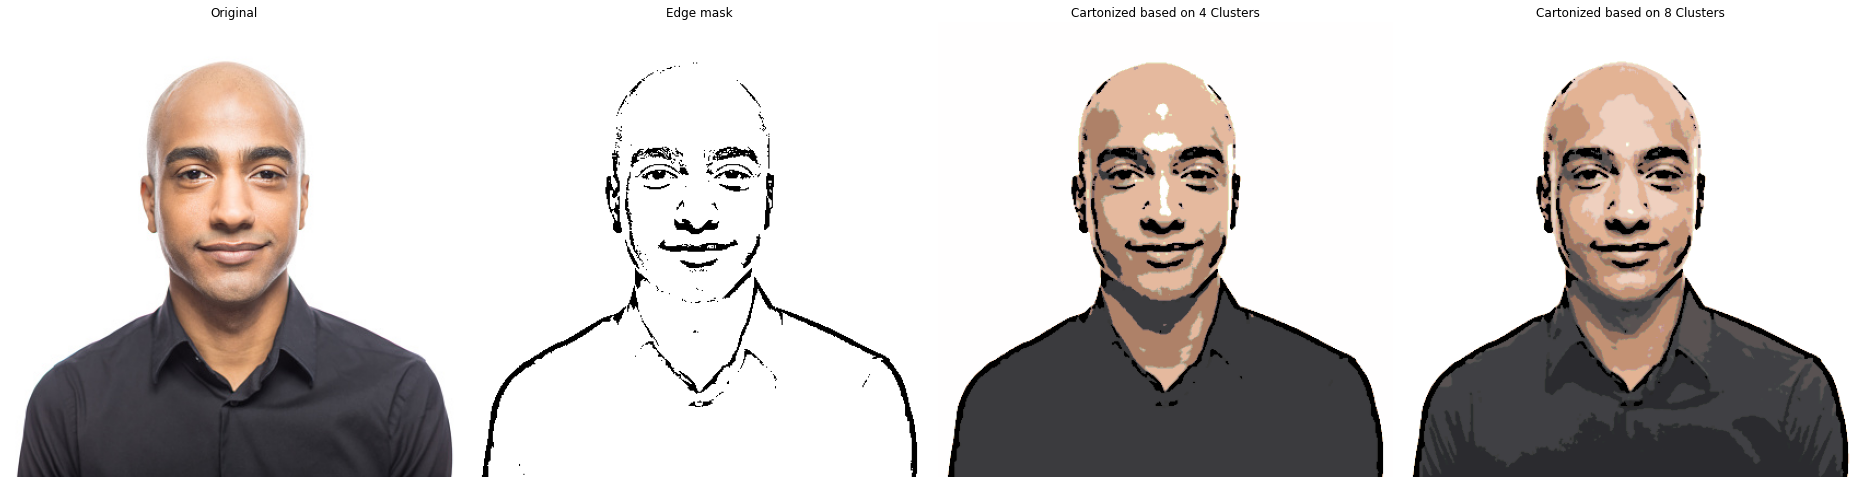

In [203]:
fig , (ax1,ax2, ax3, ax4) = plt.subplots(ncols=4, nrows=1, figsize=(26,15))

ax1.set_title("Original")
ax1.axis("off")
ax1.imshow(man_img)

ax2.set_title("Edge mask")
ax2.axis("off")
ax2.imshow(man_edges, cmap="gray")

ax3.set_title("Cartonized based on 4 Clusters")
ax3.axis("off")
ax3.imshow(man_cartonized_img_4)

ax4.set_title("Cartonized based on 8 Clusters")
ax4.axis("off")
ax4.imshow(man_cartonized_img_8)


plt.tight_layout()
plt.show()

### Test Case 2

In [204]:
man2_img = imread("Images\dorrell-tibbs-p_zTsiS1-IY-unsplash.jpg")
man2_edges =  edge_mask_detection(img=man2_img) #Returns Edges

#Using 4 clusters
man2_center_test_4, man2_label_test_4 = dominant_colours(img=man2_img, k=4) #Returns centers of the clustering and labels
man2_cartonized_img_4 = final(center=man2_center_test_4, label=man2_label_test_4, edges=man2_edges, img=man2_img)


#Using 8 clusters
man2_center_test_8, man2_label_test_8 = dominant_colours(img=man2_img, k=8) #Returns centers of the clustering and labels
man2_cartonized_img_8 = final(center=man2_center_test_8, label=man2_label_test_8, edges=man2_edges, img=man2_img)


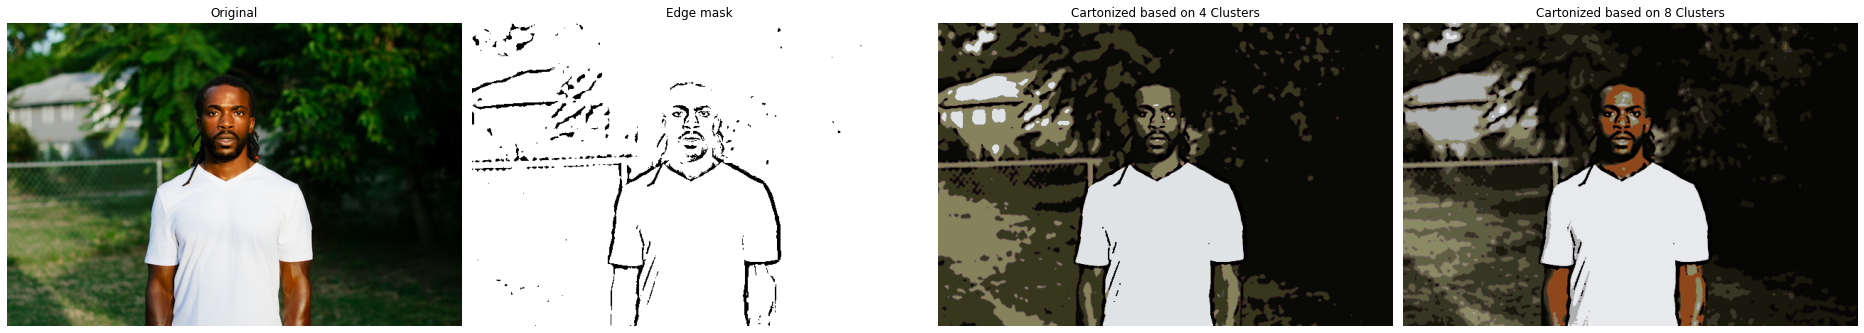

In [205]:

fig , (ax1,ax2, ax3, ax4) = plt.subplots(ncols=4, nrows=1, figsize=(26,15))

ax1.set_title("Original")
ax1.axis("off")
ax1.imshow(man2_img)

ax2.set_title("Edge mask")
ax2.axis("off")
ax2.imshow(man2_edges, cmap="gray")

ax3.set_title("Cartonized based on 4 Clusters")
ax3.axis("off")
ax3.imshow(man2_cartonized_img_4 )

ax4.set_title("Cartonized based on 8 Clusters")
ax4.axis("off")
ax4.imshow(man2_cartonized_img_8 )


plt.tight_layout()
plt.show()

### Test Case 3

In [185]:
girl_img = imread("Images\ernan-solozabal-yj7cant0Y_I-unsplash.jpg")
girl_edges =  edge_mask_detection(img=girl_img) #Returns Edges

#Using 4 clusters

girl_center_test_4, girl_label_4 = dominant_colours(img=girl_img, k=4) #Returns centers of the clustering and labels
girl_cartonized_4 = final(center=girl_center_test_4, label=girl_label_4, edges=girl_edges, img=girl_img)


#Using 8 clusters
girl_center_8, girl_label_8 = dominant_colours(img=girl_img, k=8) #Returns centers of the clustering and labels
girl_cartonized_img_8 = final(center=girl_center_8, label=girl_label_8, edges=girl_edges, img=girl_img)

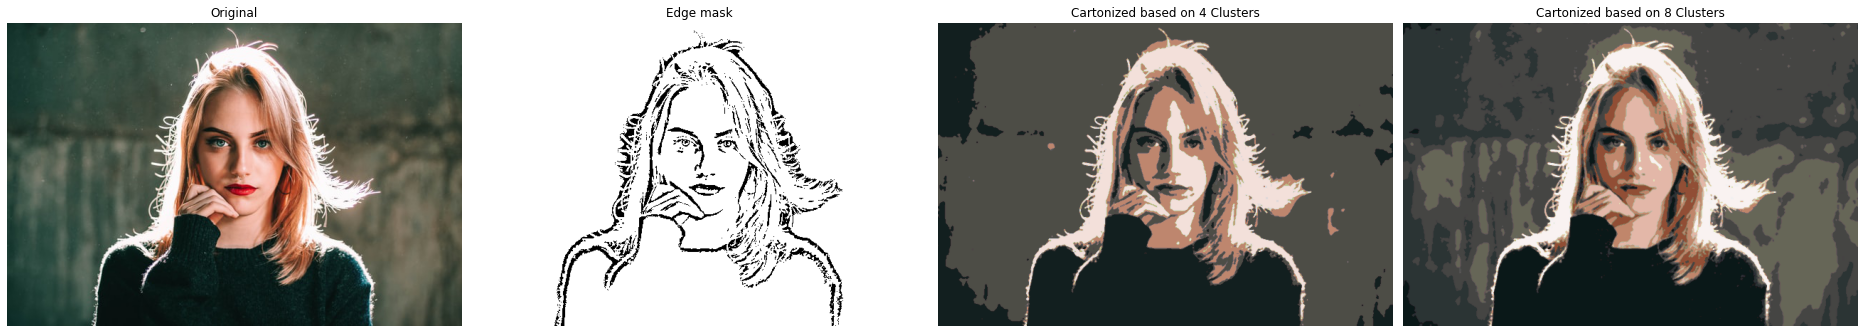

In [186]:
fig , (ax1,ax2, ax3, ax4) = plt.subplots(ncols=4, nrows=1, figsize=(26,15))

ax1.set_title("Original")
ax1.axis("off")
ax1.imshow(girl_img)

ax2.set_title("Edge mask")
ax2.axis("off")
ax2.imshow(girl_edges, cmap="gray")

ax3.set_title("Cartonized based on 4 Clusters")
ax3.axis("off")
ax3.imshow(girl_cartonized_4)

ax4.set_title("Cartonized based on 8 Clusters")
ax4.axis("off")
ax4.imshow(girl_cartonized_img_8)


plt.tight_layout()
plt.show()

### Test Case 4

In [187]:
dog_img = imread("Images\jonathan-daniels-CdVG9f96kyg-unsplash.jpg")
dog_edges=  edge_mask_detection(img=dog_img) #Returns Edges

#Using 4 clusters
dog_center_test_4, dog_label_test = dominant_colours(img=dog_img, k=4) #Returns centers of the clustering and labels
dog_cartonized_img_4 = final(center=dog_center_test_4, label=dog_label_test, edges=dog_edges, img=dog_img)


#Using 8 clusters
dog_center_test_8, label_test_2 = dominant_colours(img=dog_img, k=8) #Returns centers of the clustering and labels
dog_cartonized_img_8 = final(center=dog_center_test_8, label=label_test_2, edges=dog_edges, img=dog_img)

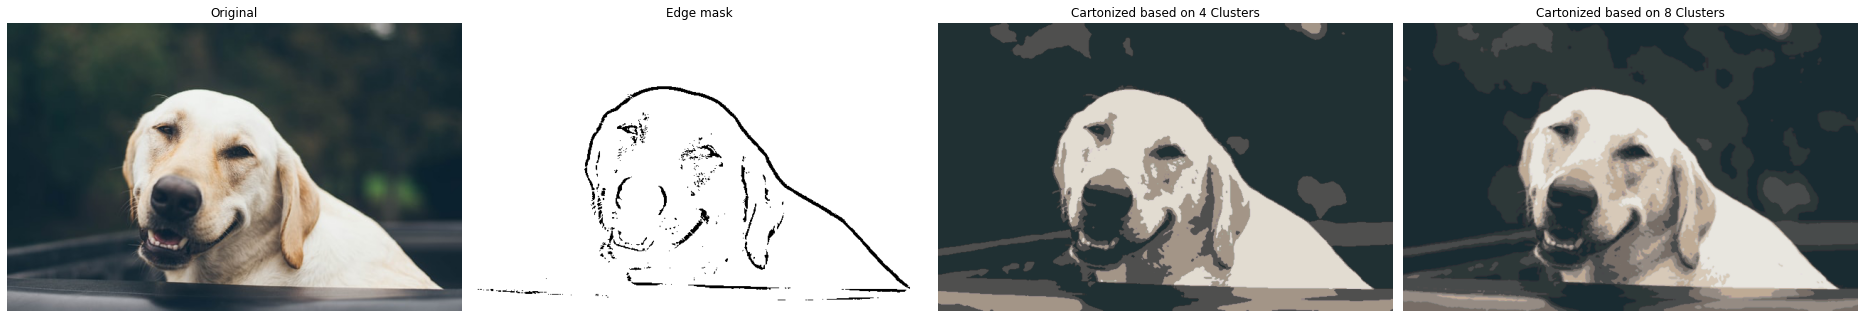

In [188]:
fig , (ax1,ax2, ax3, ax4) = plt.subplots(ncols=4, nrows=1, figsize=(26,15))

ax1.set_title("Original")
ax1.axis("off")
ax1.imshow(dog_img)

ax2.set_title("Edge mask")
ax2.axis("off")
ax2.imshow(dog_edges, cmap="gray")

ax3.set_title("Cartonized based on 4 Clusters")
ax3.axis("off")
ax3.imshow(dog_cartonized_img_4)

ax4.set_title("Cartonized based on 8 Clusters")
ax4.axis("off")
ax4.imshow(dog_cartonized_img_8)


plt.tight_layout()
plt.show()

### Test Case 5

In [189]:
cat_img = imread("Images\cat.jpg")
cat_edges =  edge_mask_detection(img=cat_img) #Returns Edges

#Using 4 clusters
cat_center_test_4, cat_label_test_4 = dominant_colours(img=cat_img, k=4) #Returns centers of the clustering and labels
cat_cartonized_img_4 = final(center=cat_center_test_4, label=cat_label_test_4, edges=cat_edges, img=cat_img)


#Using 8 clusters
cat_center_test_8, cat_label_test_8 = dominant_colours(img=cat_img, k=8) #Returns centers of the clustering and labels
cat_cartonized_img_8 = final(center=cat_center_test_8, label=cat_label_test_8, edges=cat_edges, img=cat_img)



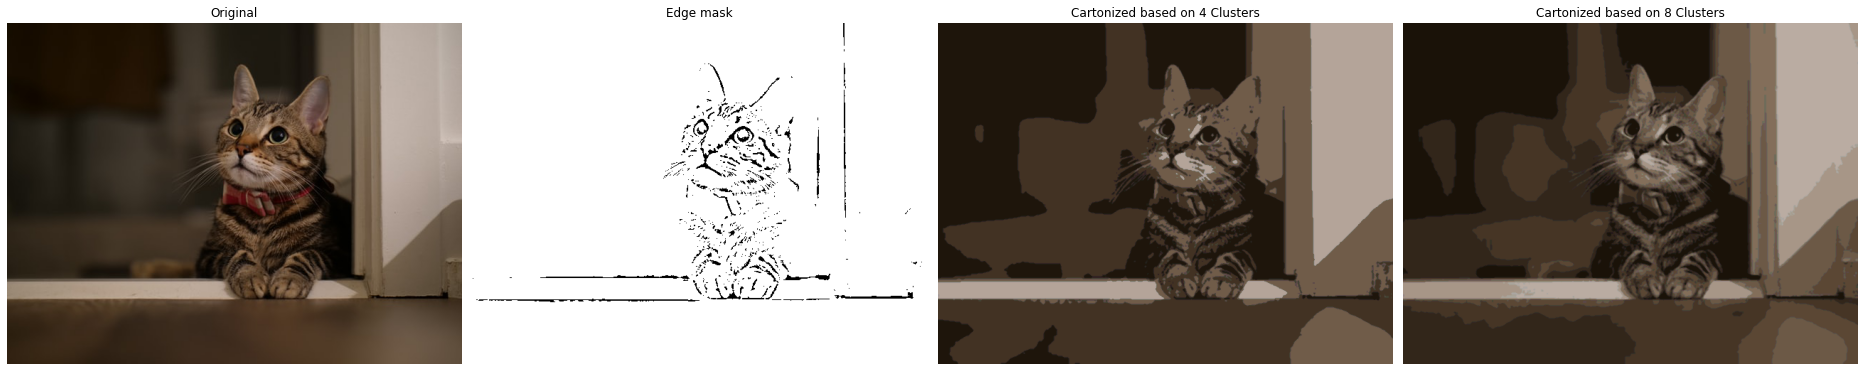

In [190]:

fig , (ax1,ax2, ax3, ax4) = plt.subplots(ncols=4, nrows=1, figsize=(26,15))

ax1.set_title("Original")
ax1.axis("off")
ax1.imshow(cat_img)

ax2.set_title("Edge mask")
ax2.axis("off")
ax2.imshow(cat_edges, cmap="gray")

ax3.set_title("Cartonized based on 4 Clusters")
ax3.axis("off")
ax3.imshow(cat_cartonized_img_4)

ax4.set_title("Cartonized based on 8 Clusters")
ax4.axis("off")
ax4.imshow(cat_cartonized_img_8)


plt.tight_layout()
plt.show()

### Test Case 6

In [191]:
car_img = imread("Images\spencer-davis-fOxS7hHmu5k-unsplash.jpg")
car_edges =  edge_mask_detection(img=car_img) #Returns Edges

#Using 4 clusters
car_center_test_4, car_label_test_4 = dominant_colours(img=car_img, k=4) #Returns centers of the clustering and labels
car_cartonized_img_4 = final(center=car_center_test_4, label=car_label_test_4, edges=car_edges, img=car_img)


#Using 8 clusters
car_center_test_8, car_label_test_8 = dominant_colours(img=car_img, k=8) #Returns centers of the clustering and labels
car_cartonized_img_8 = final(center=car_center_test_8, label=car_label_test_8, edges=car_edges, img=car_img)

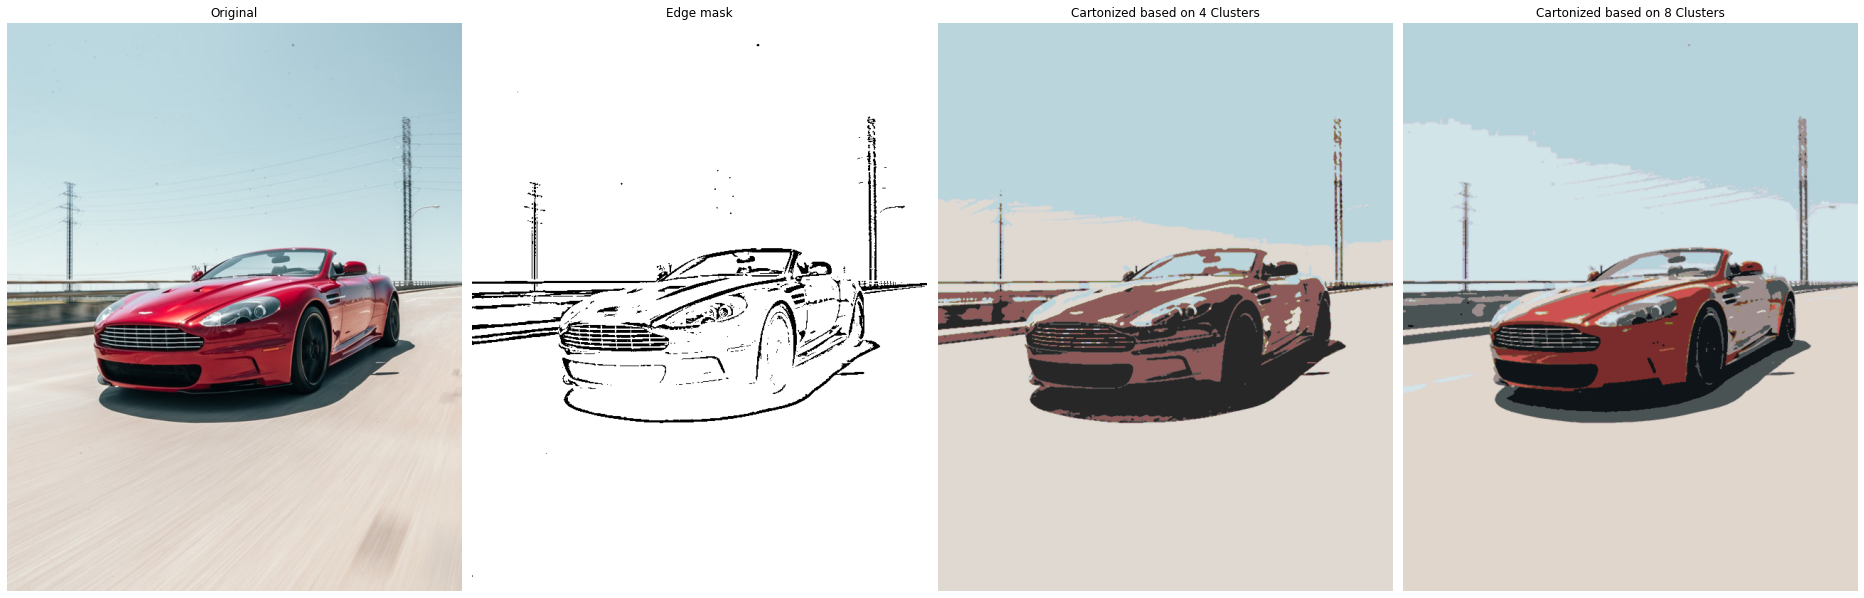

In [192]:
fig , (ax1,ax2, ax3, ax4) = plt.subplots(ncols=4, nrows=1, figsize=(26,15))

ax1.set_title("Original")
ax1.axis("off")
ax1.imshow(car_img)

ax2.set_title("Edge mask")
ax2.axis("off")
ax2.imshow(car_edges, cmap="gray")

ax3.set_title("Cartonized based on 4 Clusters")
ax3.axis("off")
ax3.imshow(car_cartonized_img_4)

ax4.set_title("Cartonized based on 8 Clusters")
ax4.axis("off")
ax4.imshow(car_cartonized_img_8)


plt.tight_layout()
plt.show()

### Test Case 7

In [193]:
house_img = imread("Images\house.jpg")
house_edges =  edge_mask_detection(img=house_img) #Returns Edges

#Using 4 clusters
house_center_test_4, house_label_test_4 = dominant_colours(img=house_img, k=4) #Returns centers of the clustering and labels
house_cartonized_img_4 = final(center=house_center_test_4, label=house_label_test_4, edges=house_edges, img=house_img)


#Using 8 clusters
house_center_test_8, house_label_test_8 = dominant_colours(img=house_img, k=8) #Returns centers of the clustering and labels
house_cartonized_img_8 = final(center=house_center_test_8, label=house_label_test_8, edges=house_edges, img=house_img)




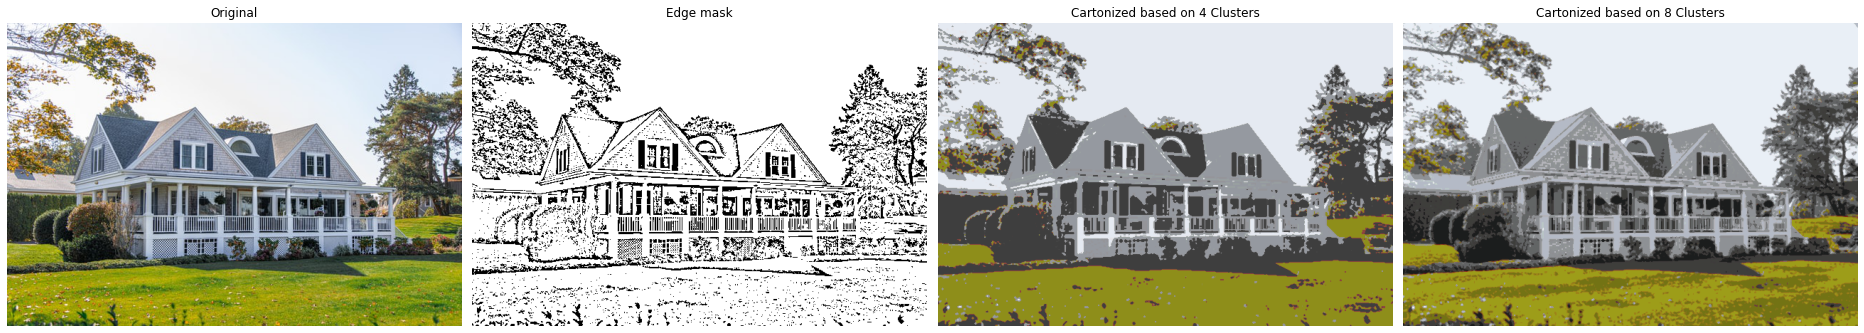

In [194]:
fig , (ax1,ax2, ax3, ax4) = plt.subplots(ncols=4, nrows=1, figsize=(26,15))

ax1.set_title("Original")
ax1.axis("off")
ax1.imshow(house_img)

ax2.set_title("Edge mask")
ax2.axis("off")
ax2.imshow(house_edges, cmap="gray")

ax3.set_title("Cartonized based on 4 Clusters")
ax3.axis("off")
ax3.imshow(house_cartonized_img_4)

ax4.set_title("Cartonized based on 8 Clusters")
ax4.axis("off")
ax4.imshow(house_cartonized_img_8)


plt.tight_layout()
plt.show()

### Test Case 8

In [195]:
crowd_img = imread("Images\julian-wan-66Mc1uJDKV4-unsplash.jpg")
crowd_edges =  edge_mask_detection(img=crowd_img) #Returns Edges

#Using 4 clusters
crowd_center_test_4, crowd_label_test_4 = dominant_colours(img=crowd_img, k=4) #Returns centers of the clustering and labels
crowd_cartonized_img_4 = final(center=crowd_center_test_4, label=crowd_label_test_4, edges=crowd_edges, img=crowd_img)


#Using 8 clusters
crowd_center_test_8, crowd_label_test_8 = dominant_colours(img=crowd_img, k=8) #Returns centers of the clustering and labels
crowd_cartonized_img_8 = final(center=crowd_center_test_8, label=crowd_label_test_8, edges=crowd_edges, img=crowd_img)



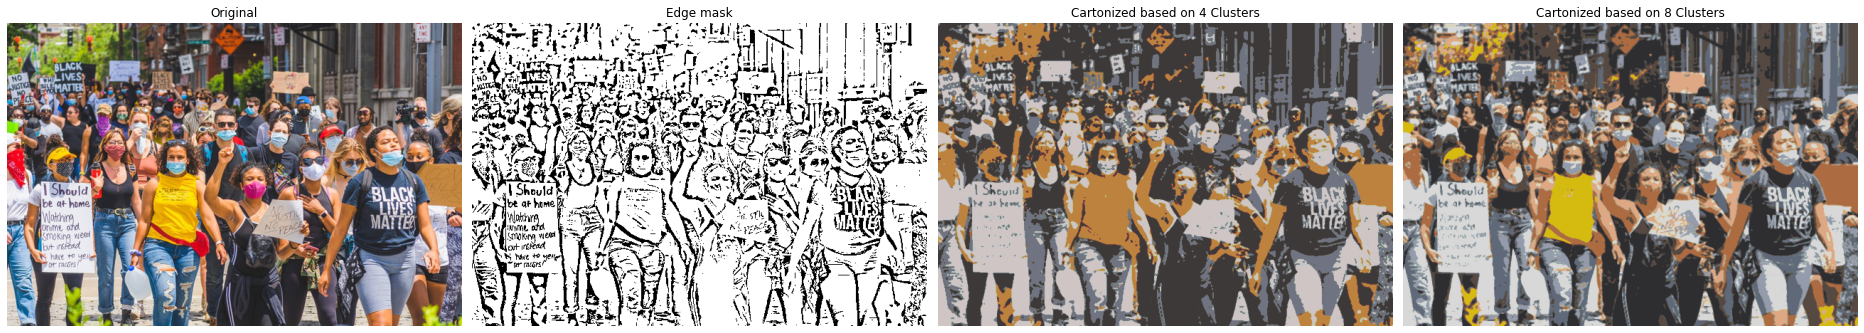

In [196]:
fig , (ax1,ax2, ax3, ax4) = plt.subplots(ncols=4, nrows=1, figsize=(26,15))

ax1.set_title("Original")
ax1.axis("off")
ax1.imshow(crowd_img)

ax2.set_title("Edge mask")
ax2.axis("off")
ax2.imshow(crowd_edges, cmap="gray")

ax3.set_title("Cartonized based on 4 Clusters")
ax3.axis("off")
ax3.imshow(crowd_cartonized_img_4)

ax4.set_title("Cartonized based on 8 Clusters")
ax4.axis("off")
ax4.imshow(crowd_cartonized_img_8)


plt.tight_layout()
plt.show()